In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data = pd.read_csv('Big Mart DataSet/Train.csv')

In [3]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
test_data = pd.read_csv('Big Mart DataSet/Test.csv')

In [5]:
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [6]:
train_data.shape

(8523, 12)

In [7]:
test_data.shape

(5681, 11)

In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [9]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [10]:
train_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [11]:
test_data.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [12]:
cols = train_data.columns

In [13]:
cols

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [14]:
num_cols = train_data._get_numeric_data().columns

In [15]:
num_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [16]:
# These are the categorical or non numerical columns
list(set(cols) - set(num_cols))

['Item_Identifier',
 'Outlet_Type',
 'Outlet_Size',
 'Outlet_Identifier',
 'Outlet_Location_Type',
 'Item_Fat_Content',
 'Item_Type']

Categorical Data in Dataset are:

* Outlet_Identifier
* Item_Fat_Content
* Outlet_Type
* Outlet_Location_Type
* Item_Identifier
* Outlet_Size
* Item_Type

Handlling Missing values

* Mean for numerical column

* Mode for categrical column

In [17]:
train_data['Outlet_Size'].value_counts()

Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

In [18]:
train_data['Outlet_Size'] = train_data.groupby('Outlet_Type')['Outlet_Size'].transform(lambda x: x.fillna(x.mode().iloc[0]))

In [19]:
train_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [20]:
test_data['Outlet_Size'] = test_data.groupby('Outlet_Type')['Outlet_Size'].transform(lambda x: x.fillna(x.mode().iloc[0]))

In [21]:
test_data.isnull().sum()

Item_Identifier                0
Item_Weight                  976
Item_Fat_Content               0
Item_Visibility                0
Item_Type                      0
Item_MRP                       0
Outlet_Identifier              0
Outlet_Establishment_Year      0
Outlet_Size                    0
Outlet_Location_Type           0
Outlet_Type                    0
dtype: int64

In [22]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [23]:
train_data['Item_Weight'].mean()

12.857645184135976

In [24]:
train_data['Item_Weight'].fillna(train_data['Item_Weight'].mean(), inplace=True)

In [25]:
test_data['Item_Weight'].mean()

12.695633368756642

In [26]:
test_data['Item_Weight'].fillna(test_data['Item_Weight'].mean(), inplace=True)

In [27]:
train_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [28]:
test_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [29]:
train_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [30]:
test_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,5681.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.245189,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,9.195000,0.027047,94.412000,1987.000000
50%,12.695633,0.054154,141.415400,1999.000000
75%,15.850000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [31]:
sns.set()

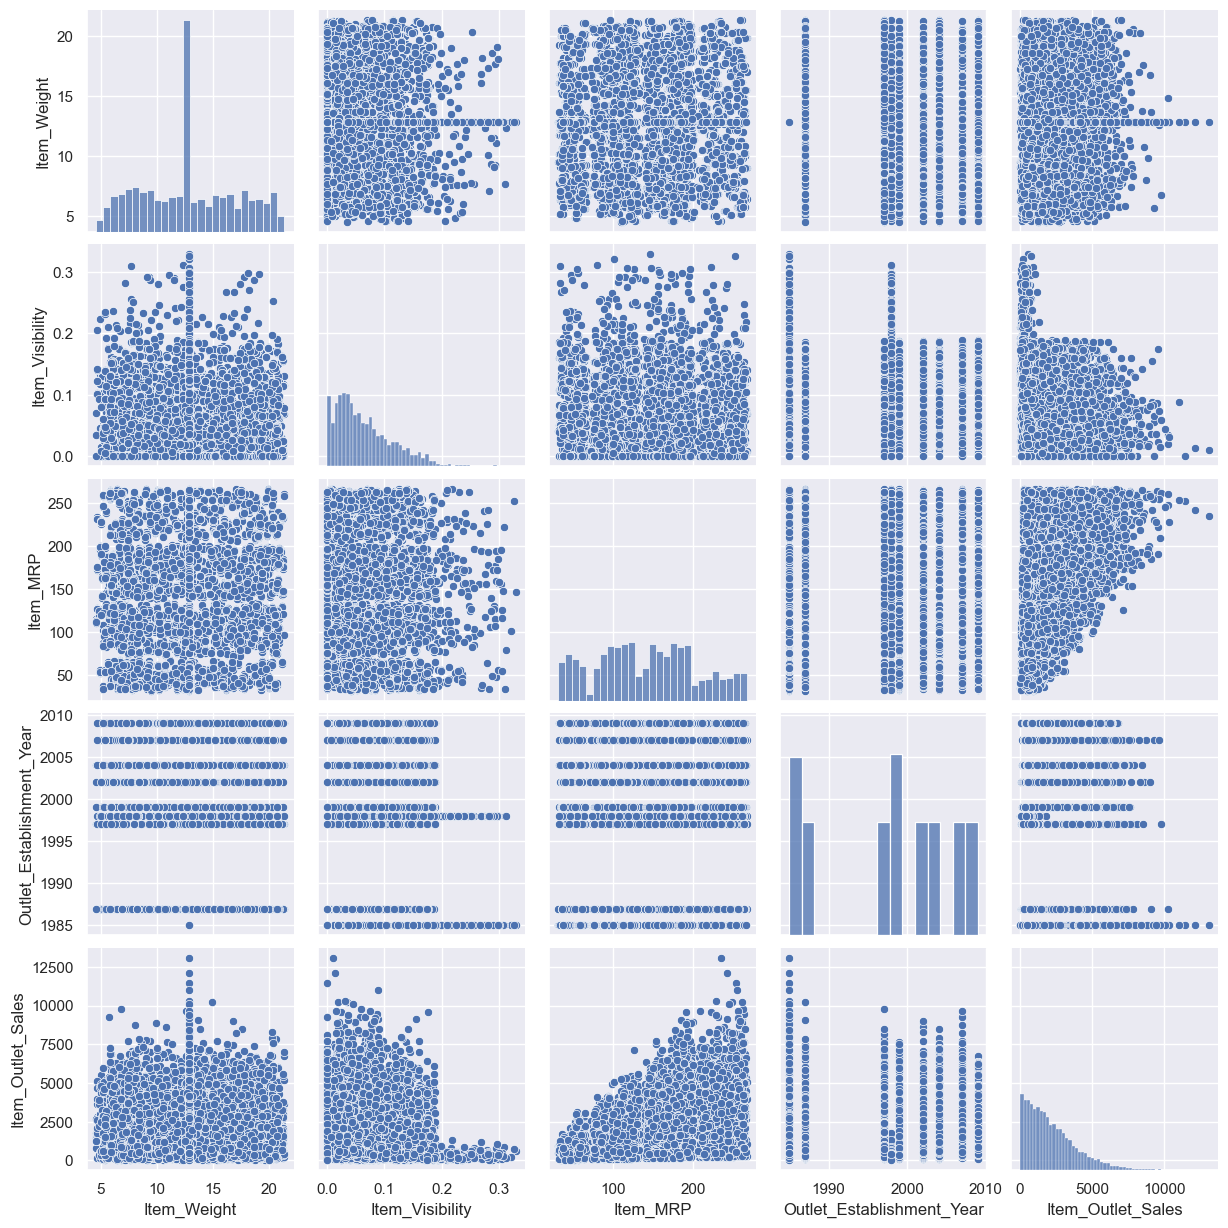

In [32]:
sns.pairplot(train_data)

<Figure size 600x600 with 0 Axes>

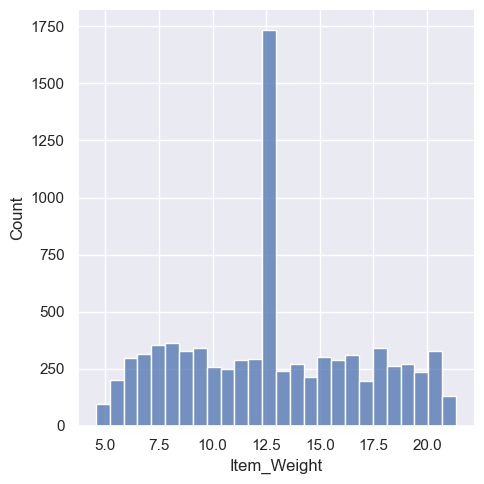

In [33]:
plt.figure(figsize=(6, 6))
sns.displot(train_data['Item_Weight'])
plt.show()

<Figure size 600x600 with 0 Axes>

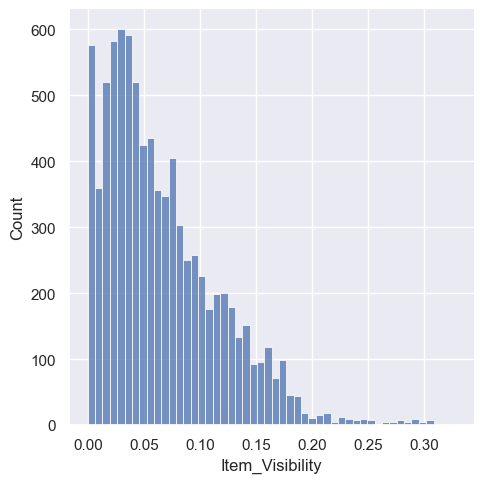

In [34]:
plt.figure(figsize=(6, 6))
sns.displot(train_data['Item_Visibility'])
plt.show()

<Figure size 600x600 with 0 Axes>

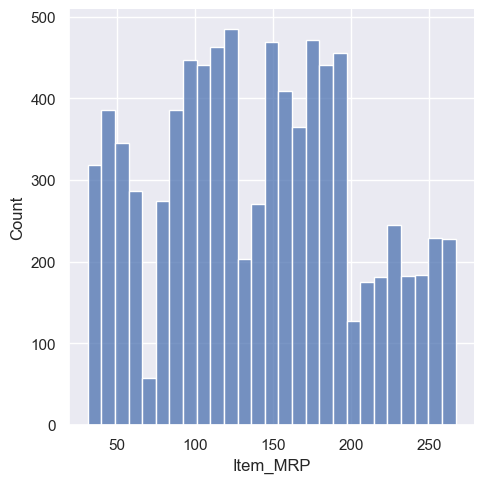

In [35]:
plt.figure(figsize=(6, 6))
sns.displot(train_data['Item_MRP'])
plt.show()

<Figure size 600x600 with 0 Axes>

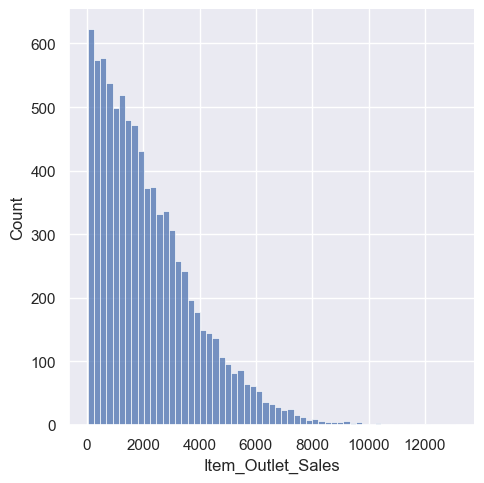

In [36]:
plt.figure(figsize=(6, 6))
sns.displot(train_data['Item_Outlet_Sales'])
plt.show()

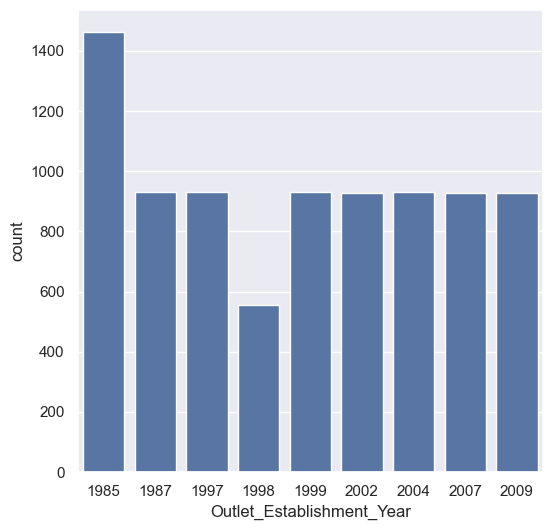

In [37]:
plt.figure(figsize=(6, 6))
sns.countplot(x = train_data['Outlet_Establishment_Year'])
plt.show()

In [38]:
train_data['Outlet_Establishment_Year'].value_counts()

Outlet_Establishment_Year
1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: count, dtype: int64

Categorical Data in Dataset are:

* Outlet_Identifier
* Item_Fat_Content
* Outlet_Type
* Outlet_Location_Type
* Item_Identifier
* Outlet_Size
* Item_Type

In [39]:
train_data['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

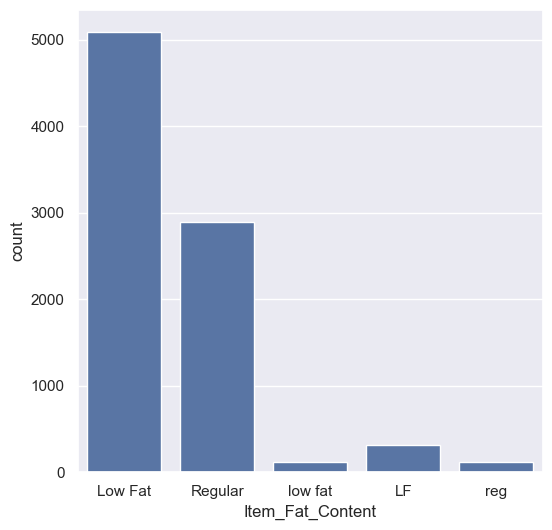

In [40]:
plt.figure(figsize=(6, 6))
sns.countplot(x = train_data['Item_Fat_Content'])
plt.show()

In [41]:
train_data['Outlet_Type'].value_counts()

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: count, dtype: int64

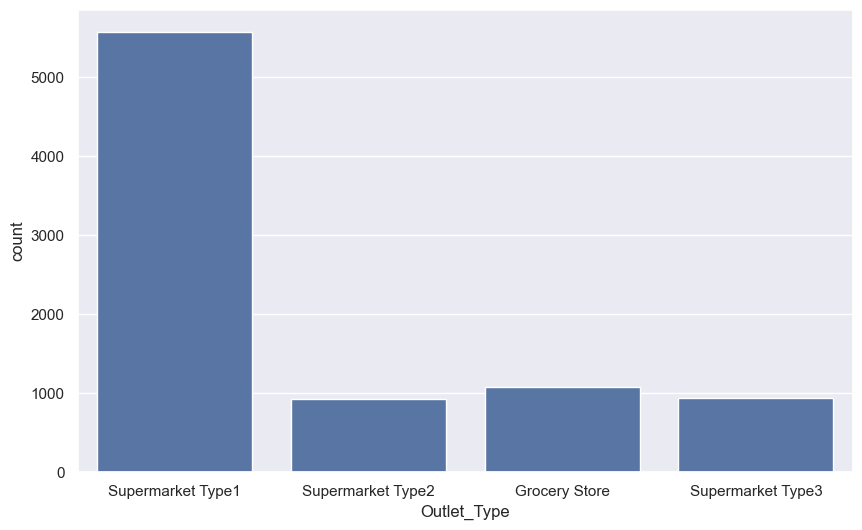

In [42]:
plt.figure(figsize=(10, 6))
sns.countplot(x = train_data['Outlet_Type'])
plt.show()

In [43]:
train_data['Outlet_Location_Type'].value_counts()

Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: count, dtype: int64

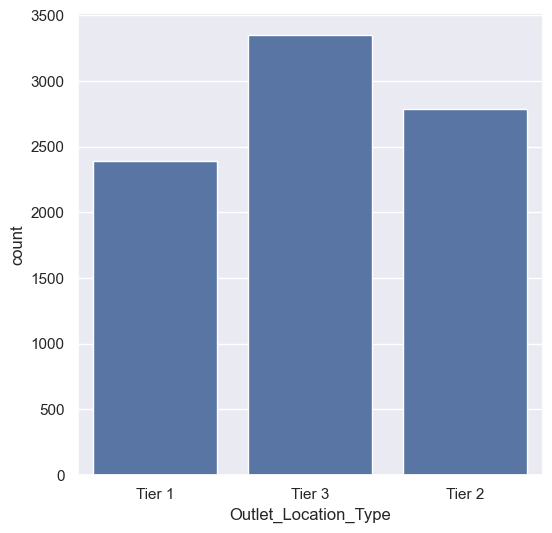

In [44]:
plt.figure(figsize=(6, 6))
sns.countplot(x = train_data['Outlet_Location_Type'])
plt.show()

In [45]:
train_data['Outlet_Identifier'].value_counts()

Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: count, dtype: int64

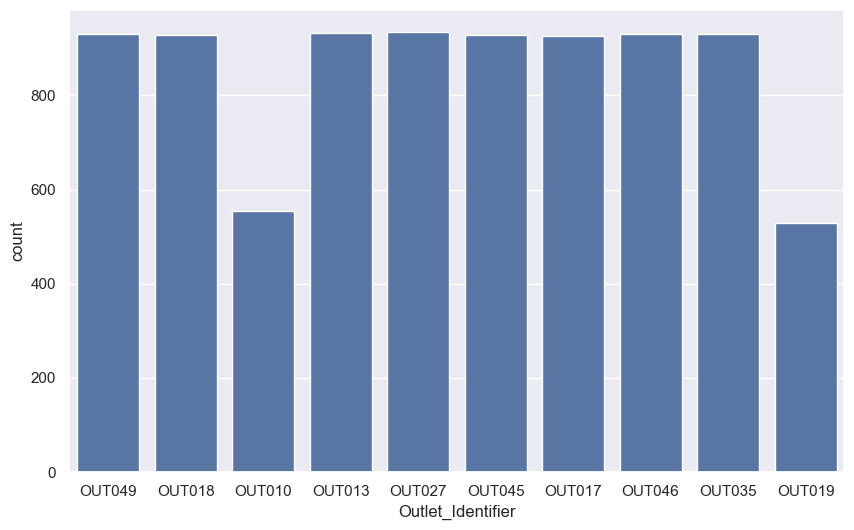

In [46]:
plt.figure(figsize=(10, 6))
sns.countplot(x = train_data['Outlet_Identifier'])
plt.show()

In [47]:
train_data['Outlet_Size'].value_counts()

Outlet_Size
Small     4798
Medium    2793
High       932
Name: count, dtype: int64

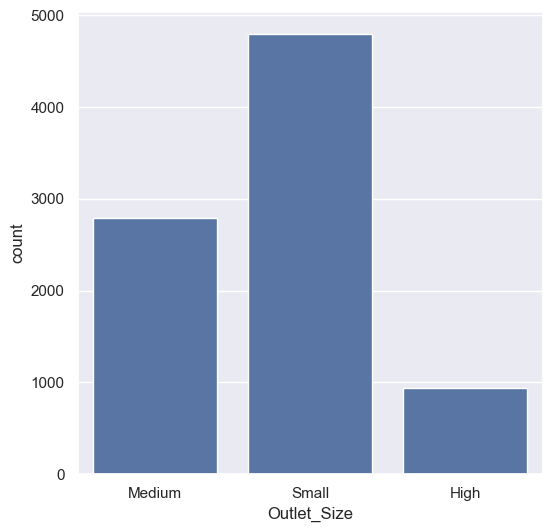

In [48]:
plt.figure(figsize=(6, 6))
sns.countplot(x = train_data['Outlet_Size'])
plt.show()

In [49]:
train_data['Item_Type'].value_counts()

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

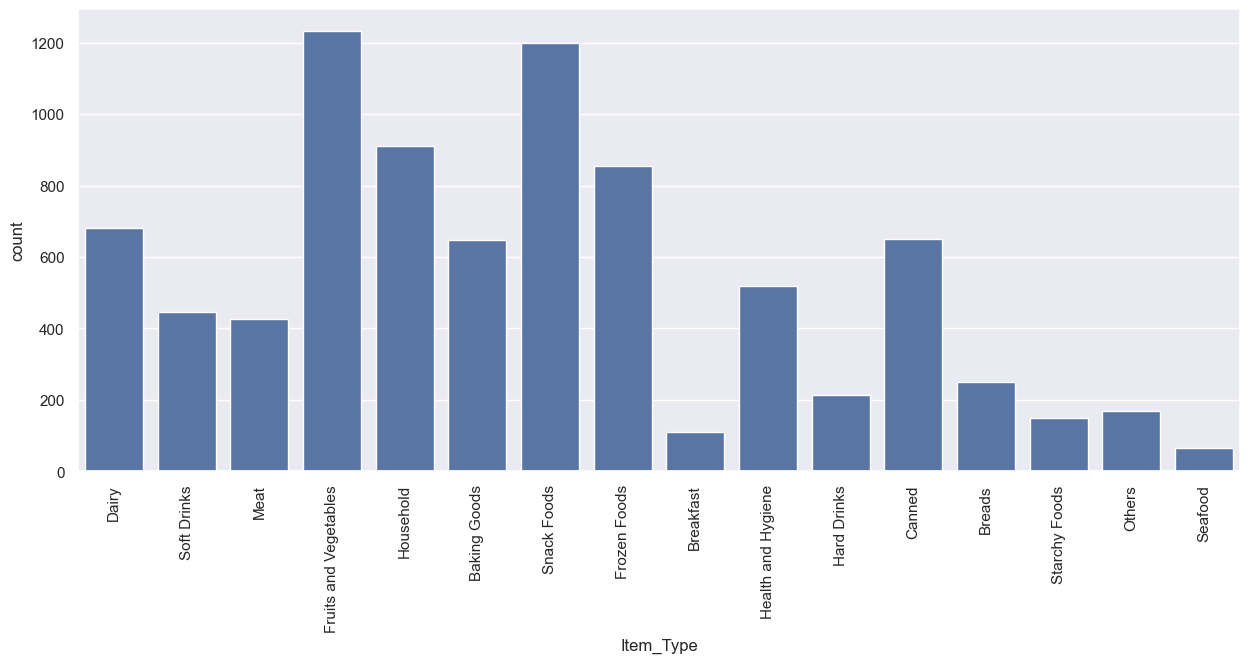

In [50]:
plt.figure(figsize=(15, 6))
sns.countplot(x = train_data['Item_Type'])
plt.xticks(rotation=90)
plt.show()

In [51]:
train_data['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [52]:
train_data['Item_Fat_Content'].replace({'low fat':'Low Fat', 'LF':'Low Fat','reg':'Regular'}, inplace=True)

In [53]:
train_data['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

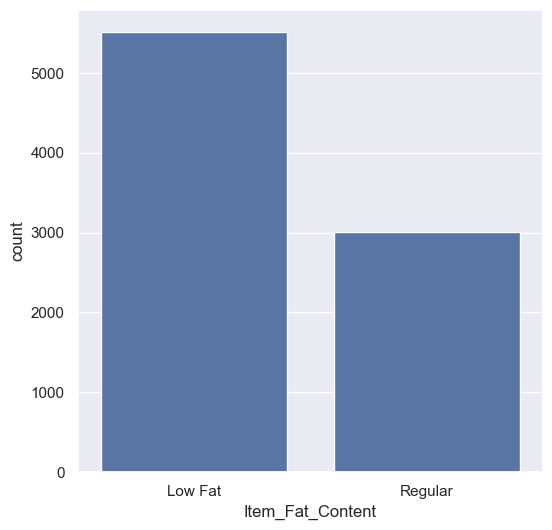

In [54]:
plt.figure(figsize=(6, 6))
sns.countplot(x = train_data['Item_Fat_Content'])
plt.show()

In [55]:
test_data['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: count, dtype: int64

In [56]:
test_data['Item_Fat_Content'].replace({'low fat':'Low Fat', 'LF':'Low Fat','reg':'Regular'}, inplace=True)

In [57]:
test_data['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    3668
Regular    2013
Name: count, dtype: int64

In [58]:
train_data['Item_Identifier'].value_counts()

Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: count, Length: 1559, dtype: int64

In [59]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [60]:
# !pip install seaborn --upgrade

In [61]:
# !pip install matplotlib==3.7.3

In [62]:
train_data.drop(columns=['Item_Identifier'],inplace=True)

In [63]:
corr = train_data.corr(numeric_only=True)

In [64]:
corr

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.012049,0.024756,-0.008301,0.011550
Item_Visibility,-0.012049,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.024756,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.008301,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.011550,-0.128625,0.567574,-0.049135,1.000000


<Axes: >

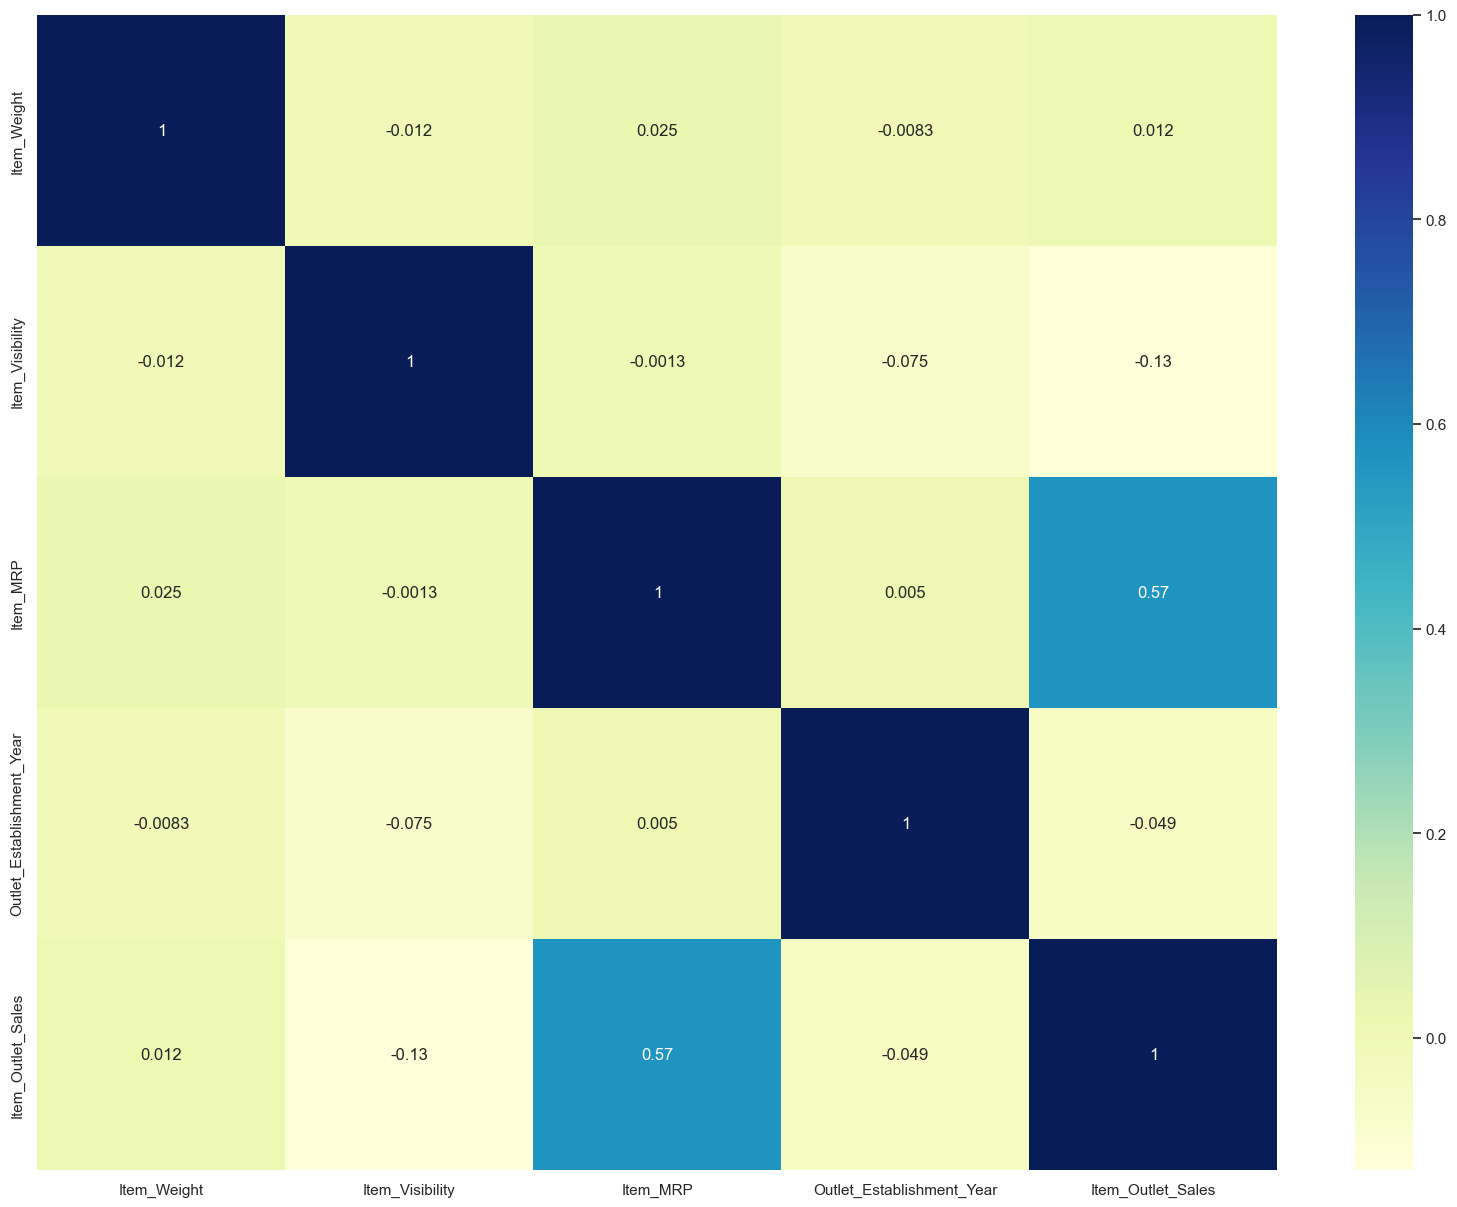

In [65]:
plt.figure(figsize=(20, 15))
sns.heatmap(corr, annot=True, cmap='YlGnBu')

In [66]:
cols = train_data.columns

In [67]:
categorical_columns=list(set(cols) - set(num_cols))
categorical_columns

['Outlet_Type',
 'Outlet_Size',
 'Outlet_Identifier',
 'Outlet_Location_Type',
 'Item_Fat_Content',
 'Item_Type']

In [68]:
test_data.drop(columns=['Item_Identifier'],inplace=True)

In [69]:
test_data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,8.300000,Regular,0.038428,Dairy,87.3198,OUT017,2007,Small,Tier 2,Supermarket Type1
2,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,1998,Small,Tier 3,Grocery Store
3,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Small,Tier 2,Supermarket Type1
4,12.695633,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [70]:
for col in categorical_columns:
    print('Frequency of categories for variable')
    print(train_data[col].value_counts())
    print("\n")

Frequency of categories for variable
Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: count, dtype: int64


Frequency of categories for variable
Outlet_Size
Small     4798
Medium    2793
High       932
Name: count, dtype: int64


Frequency of categories for variable
Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: count, dtype: int64


Frequency of categories for variable
Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: count, dtype: int64


Frequency of categories for variable
Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64


Frequency of categories for variable
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Ba

In [71]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [72]:
train_data['Outlet_Location_Type'] = encoder.fit_transform(train_data['Outlet_Location_Type'])
test_data['Outlet_Location_Type'] = encoder.fit_transform(test_data['Outlet_Location_Type'])

train_data['Outlet_Size'] = encoder.fit_transform(train_data['Outlet_Size'])
test_data['Outlet_Size'] = encoder.fit_transform(test_data['Outlet_Size'])

train_data['Outlet_Establishment_Year'] = encoder.fit_transform(train_data['Outlet_Establishment_Year'])
test_data['Outlet_Establishment_Year'] = encoder.fit_transform(test_data['Outlet_Establishment_Year'])

In [73]:
train_data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,4,1,0,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,8,1,2,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,4,1,0,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,3,2,2,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1,0,2,Supermarket Type1,994.7052


In [74]:
train_data = pd.get_dummies(train_data, columns=['Item_Type', 'Outlet_Type', 'Outlet_Identifier','Item_Fat_Content'], drop_first=False, dtype=np.int32)

In [75]:
# train_data = train_data.astype(int)
train_data.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular
0,9.30,0.016047,249.8092,4,1,0,3735.1380,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,5.92,0.019278,48.2692,8,1,2,443.4228,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,17.50,0.016760,141.6180,4,1,0,2097.2700,0,0,0,...,0,0,0,0,0,0,0,1,1,0
3,19.20,0.000000,182.0950,3,2,2,732.3800,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,8.93,0.000000,53.8614,1,0,2,994.7052,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [76]:
test_data = pd.get_dummies(test_data, columns=['Item_Type', 'Outlet_Type', 'Outlet_Identifier','Item_Fat_Content'], drop_first=False, dtype=np.int32)

In [77]:
test_data.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular
0,20.750000,0.007565,107.8622,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,8.300000,0.038428,87.3198,7,2,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,14.600000,0.099575,241.7538,3,2,2,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,7.315000,0.015388,155.0340,7,2,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,12.695633,0.118599,234.2300,0,1,2,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [78]:
X = train_data.drop(columns=['Item_Outlet_Sales'])
y = train_data['Item_Outlet_Sales']

In [79]:
X

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular
0,9.300,0.016047,249.8092,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,5.920,0.019278,48.2692,8,1,2,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,17.500,0.016760,141.6180,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
3,19.200,0.000000,182.0950,3,2,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,8.930,0.000000,53.8614,1,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8519,8.380,0.046982,108.1570,5,2,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
8520,10.600,0.035186,85.1224,6,2,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
8521,7.210,0.145221,103.1332,8,1,2,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [80]:
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [81]:
cols = train_data.columns
len(cols)

39

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [83]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components=None)
# X_train = pca.fit_transform(X_train)
# X_test = pca.fit_transform(X_test)
# explained_variance = pca.explained_variance_ratio_

# print(len(explained_variance))
# print(explained_variance)

In [84]:
# print("Sorted List returned :")
# print(sorted(explained_variance,reverse = True))

In [85]:
# with plt.style.context('dark_background'):
#     plt.figure(figsize=(16, 8))
    
#     plt.bar(range(38), explained_variance, alpha=0.5, align='center',label='individual explained variance')
#     plt.ylabel('Explained variance ratio')
#     plt.xlabel('Principal components')
#     plt.legend(loc='best')
#     plt.tight_layout()

In [86]:
# pca = PCA(n_components = 3)
# X_train = pca.fit_transform(X_train)
# X_test = pca.transform(X_test)
# explained_variance = pca.explained_variance_ratio_
# print(explained_variance)

In [87]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate
from sklearn.ensemble import AdaBoostRegressor,BaggingRegressor,GradientBoostingRegressor

In [88]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [89]:
tree1 = DecisionTreeRegressor()
tree1.fit(X_train, y_train)

DecisionTreeRegressor()

In [90]:
forest = RandomForestRegressor(n_jobs=-1)
forest.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1)

In [91]:
Ada_boost = AdaBoostRegressor()
Ada_boost.fit(X_train, y_train)

AdaBoostRegressor()

In [92]:
Bagging = BaggingRegressor()
Bagging.fit(X_train, y_train)

BaggingRegressor()

In [93]:
Gradient_boosting = GradientBoostingRegressor()
Gradient_boosting.fit(X_train, y_train)

GradientBoostingRegressor()

In [94]:
# !pip install xgboost

In [95]:
from xgboost import XGBRegressor

In [96]:
xgboost_reg = XGBRegressor()
xgboost_reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [97]:
# models= [('lin_reg', lin_reg), ('forest', forest), ('dt', tree1),('Ada_boost',Ada_boost),('Bagging',Bagging),('Gradient_boosting',Gradient_boosting), ('XGBoost', xgboost_reg)]
# scoring = ['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2']


# #for each model I want to test three different scoring metrics. Therefore, results[0] will be lin_reg x MSE, 
# # results[1] lin_reg x MSE and so on until results [8], where we stored dt x r2

# results= []
# metric= []
# for name, model in models:
#     for i in scoring:
#         scores = cross_validate(model, X_train, y_train, scoring=i, cv=10, return_train_score=True)
#         results.append(scores)

# print(results[20])

In [98]:
from sklearn.metrics import r2_score

In [99]:
y_pred1 = lin_reg.predict(X_test)
y_pred2 = tree1.predict(X_test)
y_pred3 = forest.predict(X_test)
y_pred4 = Ada_boost.predict(X_test)
y_pred5 = Bagging.predict(X_test)
y_pred6 = Gradient_boosting.predict(X_test)
y_pred7 = xgboost_reg.predict(X_test)

In [100]:
print("Linear regression", r2_score(y_test, y_pred1))
print("Dicession Tree", r2_score(y_test, y_pred2))
print("Random forest", r2_score(y_test, y_pred3))
print("Ada Boost", r2_score(y_test, y_pred4))
print("Bagging", r2_score(y_test, y_pred5))
print("Gradient Boosting", r2_score(y_test, y_pred6))
print("Xgboost", r2_score(y_test, y_pred7))

Linear regression 0.5792664114419406
Dicession Tree 0.1726504433558962
Random forest 0.5623662962956646
Ada Boost 0.4291369755281087
Bagging 0.5352169174031589
Gradient Boosting 0.6047002472228944
Xgboost 0.5312748011760005


In [101]:
from sklearn.ensemble import ExtraTreesRegressor
ext = ExtraTreesRegressor()

In [102]:
ext.fit(X_train, y_train)

ExtraTreesRegressor()

In [103]:
y_pred8 = ext.predict(X_test)

In [104]:
print("Extra tree", r2_score(y_test, y_pred8))

Extra tree 0.5258008786776049


In [110]:
mean_squared_error(y_test, y_pred1)

1641594.944877681

In [105]:
X_train.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular
549,9.500,0.035206,171.3448,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
7757,18.000,0.047473,170.5422,5,2,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
764,17.600,0.076122,111.7202,2,2,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
6867,8.325,0.029845,41.6138,5,2,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2716,12.850,0.137228,155.5630,2,2,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [106]:
from sklearn.decomposition import PCA

In [107]:
from sklearn.metrics import mean_squared_error

In [109]:
for i in range(1, 8):
    pca = PCA(n_components=i)
    X_train_trf1 = pca.fit_transform(X_train)
    X_test_trf1 = pca.transform(X_test)
    lin_reg.fit(X_train_trf1, y_train)
    tree1.fit(X_train_trf1, y_train)
    forest.fit(X_train_trf1, y_train)
    Ada_boost.fit(X_train_trf1, y_train)
    Bagging.fit(X_train_trf1, y_train)
    Gradient_boosting.fit(X_train_trf1, y_train)
    xgboost_reg.fit(X_train_trf1, y_train)
    y_pred1 = lin_reg.predict(X_test_trf1)
    y_pred2 = tree1.predict(X_test_trf1)
    y_pred3 = forest.predict(X_test_trf1)
    y_pred4 = Ada_boost.predict(X_test_trf1)
    y_pred5 = Bagging.predict(X_test_trf1)
    y_pred6 = Gradient_boosting.predict(X_test_trf1)
    y_pred7 = xgboost_reg.predict(X_test_trf1)  
    print(f'Linear regression mean_sqrd_error for {i} is =={mean_squared_error(y_test,y_pred1)}')
    print(f'Decision Tree mean_sqrd_error for {i} is =={mean_squared_error(y_test,y_pred2)}')    
    print(f'Random Forest mean_sqrd_error for {i} is =={mean_squared_error(y_test,y_pred3)}')    
    print(f'Ada Boost mean_sqrd_error for {i} is =={mean_squared_error(y_test,y_pred4)}')    
    print(f'Bagging mean_sqrd_error for {i} is =={mean_squared_error(y_test,y_pred5)}')    
    print(f'Gradient Boosting mean_sqrd_error for {i} is =={mean_squared_error(y_test,y_pred6)}')   
    print(f'XgBoost mean_sqrd_error for {i} is =={mean_squared_error(y_test,y_pred7)}')    

Linear regression mean_sqrd_error for 1 is ==1818214.429163286
Decision Tree mean_sqrd_error for 1 is ==3785782.6122579803
Random Forest mean_sqrd_error for 1 is ==2732469.4203820666
Ada Boost mean_sqrd_error for 1 is ==1968592.0914442912
Bagging mean_sqrd_error for 1 is ==2791131.0580743146
Gradient Boosting mean_sqrd_error for 1 is ==1859606.8231747737
XgBoost mean_sqrd_error for 1 is ==1860648.166160483
Linear regression mean_sqrd_error for 2 is ==1818449.6774952228
Decision Tree mean_sqrd_error for 2 is ==3201986.3711590297
Random Forest mean_sqrd_error for 2 is ==1908494.4979428186
Ada Boost mean_sqrd_error for 2 is ==1871502.981148782
Bagging mean_sqrd_error for 2 is ==2013545.47557265
Gradient Boosting mean_sqrd_error for 2 is ==1839839.3604509577
XgBoost mean_sqrd_error for 2 is ==1922796.3438465402
Linear regression mean_sqrd_error for 3 is ==1821432.9781647439
Decision Tree mean_sqrd_error for 3 is ==2123284.7187380437
Random Forest mean_sqrd_error for 3 is ==1269416.98687981